In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as pyplot

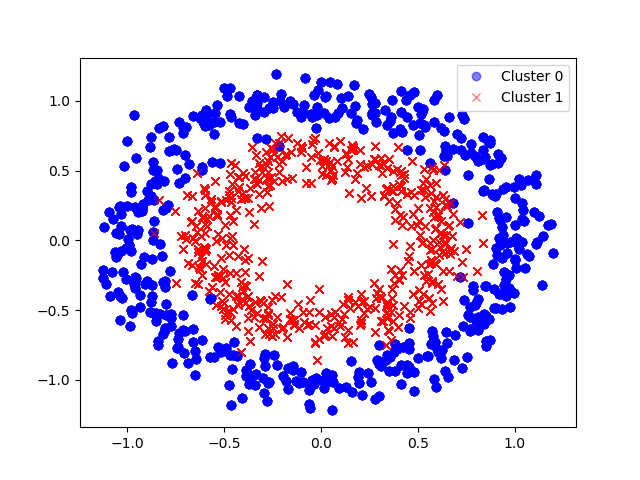

In [2]:
def plot_data(plot, x, y):
    plot.plot(x[y==0, 0], x[y==0, 1], 'ob', alpha=0.5)
    plot.plot(x[y==1, 0], x[y==1, 1], 'xr', alpha=0.5)
    plot.legend(['Cluster 0', 'Cluster 1'])
    return plot
  
X, y = make_circles(n_samples = 1000, factor = 0.6, noise = 0.1, random_state = 64)

plot = plot_data(pyplot, X, y)
display(plot.show())

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(2, 4)
        self.layer2 = nn.Linear(4, 2)
        self.layer3 = nn.Linear(2, 1)
    
    def forward(self, x):
      x = self.layer1(x)
      x = torch.relu(x)
      x = self.layer2(x)
      x = torch.relu(x)
      x = self.layer3(x)
      return torch.sigmoid(x)


In [4]:
Net = NeuralNetwork()
print(Net)

NeuralNetwork(
 (layer1): Linear(in_features=2, out_features=4, bias=True)
 (layer2): Linear(in_features=4, out_features=2, bias=True)
 (layer3): Linear(in_features=2, out_features=1, bias=True)
)

In [5]:
criterion = nn.BCELoss()
optimizer = optim.Adam(Net.parameters(), lr=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 64)

In [6]:
for i in range(50):
  input = Variable(torch.FloatTensor(X_train[i]))
  ground_truth = Variable(torch.FloatTensor(y_train[i]))
  if ground_truth is not None: 
    ground_truth = torch.zeros(1)
    
  optimizer.zero_grad()
  pred = Net(input)
  loss = criterion(pred, ground_truth)
  loss.backward()
  optimizer.step()
  
  print("For iteration %d we get a loss of: %f" % (i, loss))

For iteration 0 we get a loss of: 0.873277
For iteration 1 we get a loss of: 0.756345
For iteration 2 we get a loss of: 0.542653
For iteration 3 we get a loss of: 0.383292
For iteration 4 we get a loss of: 0.305897
For iteration 5 we get a loss of: 0.135012
For iteration 6 we get a loss of: 0.117535
For iteration 7 we get a loss of: 0.032403
For iteration 8 we get a loss of: 0.019582
For iteration 9 we get a loss of: 0.025819
For iteration 10 we get a loss of: 0.013406
For iteration 11 we get a loss of: 0.010793
For iteration 12 we get a loss of: 0.000196
For iteration 13 we get a loss of: 0.000102
For iteration 14 we get a loss of: 0.000627
For iteration 15 we get a loss of: 0.000012
For iteration 16 we get a loss of: 0.000124
For iteration 17 we get a loss of: 0.000128
For iteration 18 we get a loss of: 0.000004
For iteration 19 we get a loss of: 0.000012
For iteration 20 we get a loss of: 0.000007
For iteration 21 we get a loss of: 0.000004
For iteration 22 we get a loss of: 0.000005
For iteration 23 we get a loss of: 0.000004
For iteration 24 we get a loss of: 0.000000
For iteration 25 we get a loss of: 0.000000
For iteration 26 we get a loss of: 0.000001
For iteration 27 we get a loss of: 0.000000
For iteration 28 we get a loss of: 0.000000
For iteration 29 we get a loss of: 0.000000
For iteration 30 we get a loss of: 0.000000
For iteration 31 we get a loss of: 0.000000
For iteration 32 we get a loss of: 0.000000
For iteration 33 we get a loss of: 0.000000
For iteration 34 we get a loss of: 0.000000
For iteration 35 we get a loss of: 0.000000
For iteration 36 we get a loss of: 0.000000
For iteration 37 we get a loss of: 0.000000
For iteration 38 we get a loss of: 0.000000
For iteration 39 we get a loss of: 0.000000
For iteration 40 we get a loss of: 0.000000
For iteration 41 we get a loss of: 0.000000
For iteration 42 we get a loss of: 0.000000
For iteration 43 we get a loss of: 0.000000
For iteration 44 we get a loss of: 0.000000
For iteration 45 we get a loss of: 0.000000
For iteration 46 we get a loss of: 0.000000
For iteration 47 we get a loss of: 0.000000
For iteration 48 we get a loss of: 0.000000
For iteration 49 we get a loss of: 0.000000